<a href="https://colab.research.google.com/github/christine127/Portfolio_Recommendation_Project/blob/main/MBTI_16%EA%B0%80%EC%A7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
from tqdm import tqdm
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score

path= '/content/drive/MyDrive/소회의실 프로젝트/전처리_완료/'

In [ ]:
customer_info = pd.read_csv(path +'클러스터링_16가지.csv')

In [ ]:

cluster1_col = ['large_cap', 'EPS', 'DIV', 'ATR_7']
cluster5_col = ['업종개수', 'medium_cap', 'medium_cap_period', 'small_cap_period']
cluster6_col = ['매도매수일치_외국인', 'medium_cap', 'small_cap']
cluster7_col = ['수익률', 'PBR', '상하한가여부']

cluster_col = cluster1_col + cluster5_col + cluster6_col + cluster7_col

In [ ]:
cluster_col

['large_cap',
 'EPS',
 'DIV',
 'ATR_7',
 '업종개수',
 'medium_cap',
 'medium_cap_period',
 'small_cap_period',
 '매도매수일치_외국인',
 'medium_cap',
 'small_cap',
 '수익률',
 'PBR',
 '상하한가여부']

In [ ]:
temp_cluster_0 = customer_info[customer_info.MBTI == 'AAAA'].loc[:, cluster_col]
temp_cluster_1 = customer_info[customer_info.MBTI == 'AAAB'].loc[:, cluster_col]
temp_cluster_2 = customer_info[customer_info.MBTI == 'AABA'].loc[:, cluster_col]
temp_cluster_3 = customer_info[customer_info.MBTI == 'AABB'].loc[:, cluster_col]
temp_cluster_4 = customer_info[customer_info.MBTI == 'ABAA'].loc[:, cluster_col]
temp_cluster_5 = customer_info[customer_info.MBTI == 'ABAB'].loc[:, cluster_col]
temp_cluster_6 = customer_info[customer_info.MBTI == 'ABBA'].loc[:, cluster_col]
temp_cluster_7 = customer_info[customer_info.MBTI == 'ABBB'].loc[:, cluster_col]
temp_cluster_8 = customer_info[customer_info.MBTI == 'BAAA'].loc[:, cluster_col]
temp_cluster_9 = customer_info[customer_info.MBTI == 'BAAB'].loc[:, cluster_col]
temp_cluster_10 = customer_info[customer_info.MBTI == 'BABA'].loc[:, cluster_col]
temp_cluster_11 = customer_info[customer_info.MBTI == 'BABB'].loc[:, cluster_col]
temp_cluster_12 = customer_info[customer_info.MBTI == 'BBAA'].loc[:, cluster_col]
temp_cluster_13 = customer_info[customer_info.MBTI == 'BBAB'].loc[:, cluster_col]
temp_cluster_14 = customer_info[customer_info.MBTI == 'BBBA'].loc[:, cluster_col]
temp_cluster_15 = customer_info[customer_info.MBTI == 'BBBB'].loc[:, cluster_col]

In [ ]:

col_list = list(temp_cluster_0)

j = 1
plt.figure(figsize= (100, 20))
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)


for i in range(len(cluster_col)):



    plt.subplot(16,len(cluster_col),j)
    plt.hist(temp_cluster_1[col_list[i]])
    plt.xlabel(col_list[i])
    j += 1

    plt.subplot(16,len(cluster_col),j)
    plt.hist(temp_cluster_2[col_list[i]])
    plt.xlabel(col_list[i])
    j += 1

    plt.subplot(16,len(cluster_col),j)
    plt.hist(temp_cluster_3[col_list[i]])
    plt.xlabel(col_list[i])
    j += 1

    plt.subplot(16,len(cluster_col),j)
    plt.hist(temp_cluster_4[col_list[i]])
    plt.xlabel(col_list[i])
    j += 1

    plt.subplot(16,len(cluster_col),j)
    plt.hist(temp_cluster_5[col_list[i]])
    plt.xlabel(col_list[i])
    j += 1
    
    plt.subplot(16,len(cluster_col),j)
    plt.hist(temp_cluster_6[col_list[i]])
    plt.xlabel(col_list[i])
    j += 1

    plt.subplot(16,len(cluster_col),j)
    plt.hist(temp_cluster_7[col_list[i]])
    plt.xlabel(col_list[i])
    j += 1

    plt.subplot(16,len(cluster_col),j)
    plt.hist(temp_cluster_8[col_list[i]])
    plt.xlabel(col_list[i])
    j += 1

    plt.subplot(16,len(cluster_col),j)
    plt.hist(temp_cluster_9[col_list[i]])
    plt.xlabel(col_list[i])
    j += 1

    plt.subplot(16,len(cluster_col),j)
    plt.hist(temp_cluster_10[col_list[i]])
    plt.xlabel(col_list[i])
    j += 1
    
    plt.subplot(16,len(cluster_col),j)
    plt.hist(temp_cluster_11[col_list[i]])
    plt.xlabel(col_list[i])
    j += 1

    plt.subplot(16,len(cluster_col),j)
    plt.hist(temp_cluster_12[col_list[i]])
    plt.xlabel(col_list[i])
    j += 1

    plt.subplot(16,len(cluster_col),j)
    plt.hist(temp_cluster_13[col_list[i]])
    plt.xlabel(col_list[i])
    j += 1

    plt.subplot(16,len(cluster_col),j)
    plt.hist(temp_cluster_14[col_list[i]])
    plt.xlabel(col_list[i])
    j += 1
    
    plt.subplot(16,len(cluster_col),j)
    plt.hist(temp_cluster_15[col_list[i]])
    plt.xlabel(col_list[i])
    j += 1

plt.show()

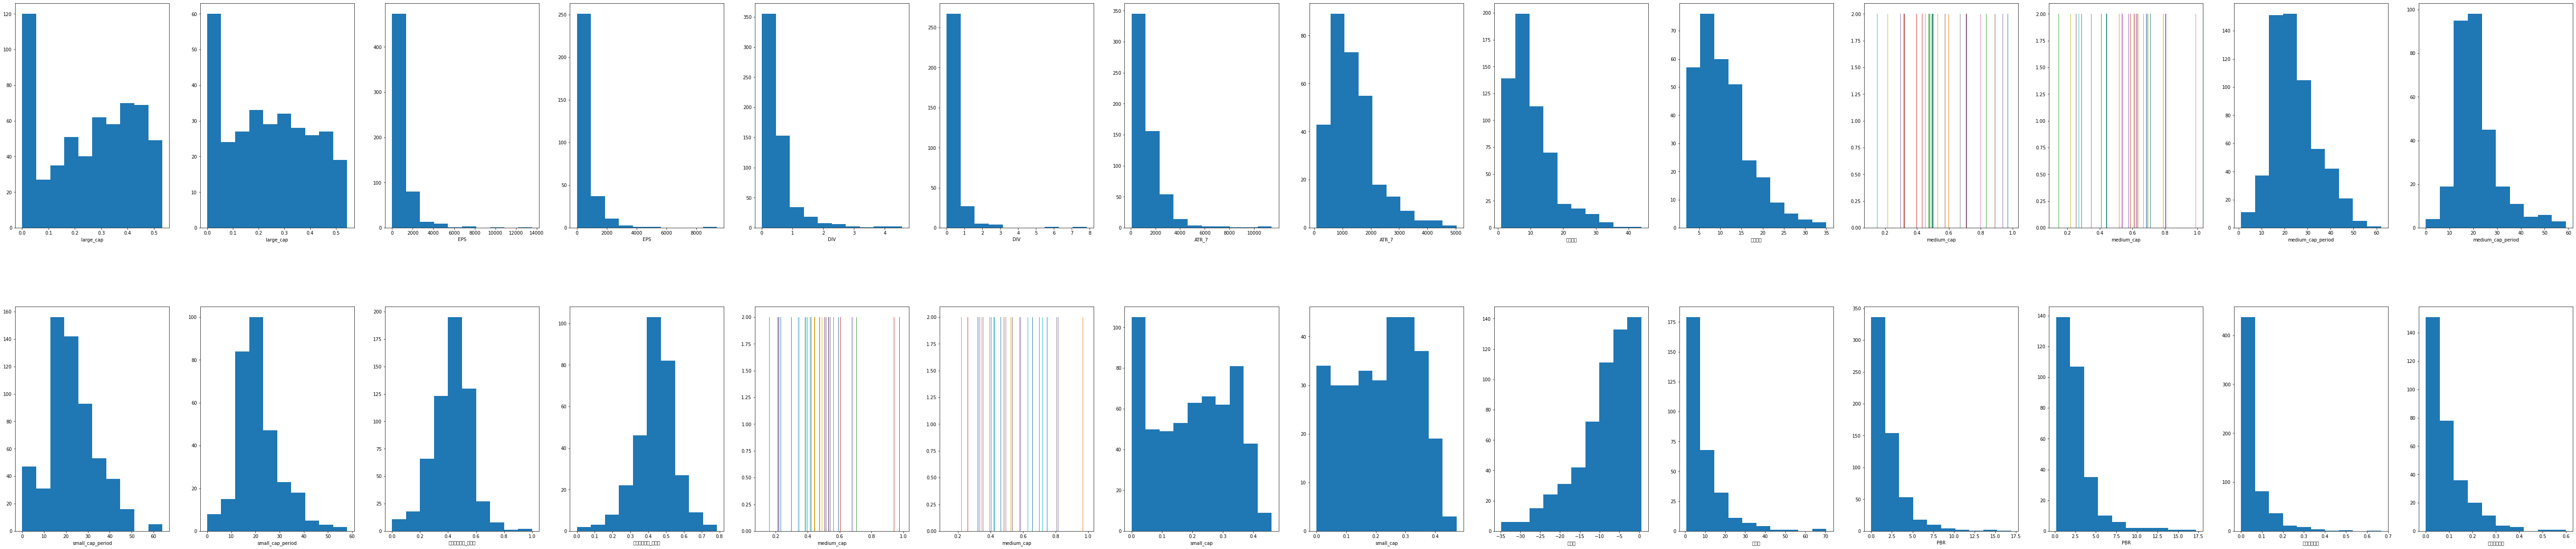

In [ ]:
j = 1
plt.figure(figsize= (100, 20))
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)


for i in range(len(cluster_col)):
    plt.subplot(2,len(cluster_col),j)
    plt.hist(temp_cluster_10[col_list[i]])
    plt.xlabel(col_list[i])
    # plt.ylim(0, 2000)
    j += 1

    plt.subplot(2,len(cluster_col),j)
    plt.hist(temp_cluster_11[col_list[i]])
    plt.xlabel(col_list[i])
    # plt.ylim(0, 800)
    j += 1

  
plt.show()

In [ ]:
col_list

['large_cap',
 'EPS',
 'DIV',
 'ATR_7',
 '업종개수',
 'medium_cap',
 'medium_cap_period',
 'small_cap_period',
 '매도매수일치_외국인',
 'medium_cap',
 'small_cap',
 '수익률',
 'PBR',
 '상하한가여부']

In [ ]:
dataset = pd.read_csv(path + '원본_brif_공모수정.csv', encoding='cp949')
dataset.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
file = dataset.copy()

In [ ]:
file

,고객구분코드,주문일자,고객성별구분코드,동일나이군구분코드,주소(시도),주문시간대,상품번호,상품명,거래소구분코드,매도매수구분코드,주문구분코드,실주문단가,주문수량,총체결수량,총체결금액,전일종가,당일시가,일중고가,일중저가,당일종가,거래수량,거래대금,상한가여부,하한가여부,date,code,stock_type,업종명,상하한가여부,PER,PBR,ROE,EPS,DIV,외국인_순매수액,기관_순매수액,외국인_매도매수구분코드,기관_매도매수구분코드,TR,ATR_7,ATR_14,신규종목여부
0,A00010002,2020-03-04,2,20,대전,1,00000A005930,삼성전자보통주,2,2,1,56300,9,9,506700,55400,54800,57600,54600,57400,24274056,1377290000000,0,0,2020-03-04,005930,large_cap,전기전자,0,8.88,1.62,5.481481,6461.0,2.47,1.746511e+11,-5.908078e+10,2,1,3000.0,1942.857143,1750.000000,0
1,A00010002,2020-03-10,2,20,대전,1,00000A294140,레몬,3,2,1,12550,23,23,288650,11800,12700,13400,10150,10600,24276359,290689000000,0,0,2020-03-10,294140,kosdaq_cap,화학,0,0.00,12.38,0.000000,0.0,0.00,-1.579992e+08,-1.353072e+09,1,1,3250.0,1890.000000,0.000000,1
2,A00010002,2020-03-12,2,20,대전,3,00000A294140,레몬,3,1,1,12050,10,10,120500,11150,11150,12250,10650,11850,10872467,126434000000,0,0,2020-03-12,294140,kosdaq_cap,화학,0,0.00,13.84,0.000000,0.0,0.00,-4.785265e+07,-4.147980e+07,1,1,1600.0,1761.428571,0.000000,1
3,A00010002,2020-03-13,2,20,대전,1,00000A096530,씨젠,3,2,1,49400,5,5,247000,56500,55600,57500,46400,49350,7685239,385649000000,0,0,2020-03-13,096530,kosdaq_cap,제약,0,130.56,9.41,13.874601,378.0,0.00,5.698348e+09,-6.293640e+09,2,1,11100.0,10792.857143,7021.428571,0
4,A00010002,2020-03-23,2,20,대전,1,00000A002720,국제약품보통주,2,1,1,4600,40,40,184000,4410,4410,5200,4410,5200,5827357,27592475085,0,0,2020-03-23,002720,small_cap,의약품,0,41.27,1.39,29.690647,126.0,0.58,-9.060532e+08,2.332210e+06,1,2,790.0,720.714286,632.500000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273506,A0009995,2020-03-23,1,30,인천,2,00000A004020,현대제철 보통주,2,2,1,12900,33,33,425700,13700,12800,13750,12400,13150,952577,12398876450,0,0,2020-03-23,004020,large_cap,철강금속,0,4.33,0.11,39.363636,3037.0,5.70,-3.377997e+08,-5.053098e+08,1,1,1350.0,1842.857143,1517.857143,0
273507,A0009995,2020-03-23,1,30,인천,3,00000A002800,신신제약,3,1,1,6750,2,2,13500,7000,6930,6930,6370,6720,2178510,14480057840,0,0,2020-03-23,002800,kosdaq_cap,제약,0,35.18,1.87,18.812834,191.0,0.49,7.517056e+07,2.201800e+07,2,2,630.0,1137.857143,721.785714,0
273508,A0009995,2020-03-13,1,30,인천,1,00000A143210,핸즈코퍼레이션보통주,2,1,1,5950,10,10,59500,6240,6130,6130,5490,5920,33300,192174890,0,0,2020-03-13,143210,small_cap,운수장비,0,30.52,0.40,76.300000,194.0,1.69,-1.204244e+07,6.144381e+07,1,2,750.0,385.714286,300.714286,0
273509,A0009997,2020-03-03,1,20,경기,1,00000A238490,힘스,3,2,1,20400,1,1,20400,19750,20600,20750,19600,19600,55008,1108298550,0,0,2020-03-03,238490,kosdaq_cap,반도체,0,0.00,2.11,0.000000,0.0,0.00,-2.522890e+08,5.419900e+06,1,2,1150.0,1578.571429,1346.428571,0


In [ ]:
file[file['상품명']=='삼성전자보통주']

,고객구분코드,주문일자,고객성별구분코드,동일나이군구분코드,주소(시도),주문시간대,상품번호,상품명,거래소구분코드,매도매수구분코드,주문구분코드,실주문단가,주문수량,총체결수량,총체결금액,전일종가,당일시가,일중고가,일중저가,당일종가,거래수량,거래대금,상한가여부,하한가여부,date,code,stock_type,업종명,상하한가여부,PER,PBR,ROE,EPS,DIV,외국인_순매수액,기관_순매수액,외국인_매도매수구분코드,기관_매도매수구분코드,TR,ATR_7,ATR_14,신규종목여부
0,A00010002,2020-03-04,2,20,대전,1,00000A005930,삼성전자보통주,2,2,1,56300,9,9,506700,55400,54800,57600,54600,57400,24274056,1377290000000,0,0,2020-03-04,005930,large_cap,전기전자,0,8.88,1.62,5.481481,6461.0,2.47,1.746511e+11,-5.908078e+10,2,1,3000.0,1942.857143,1750.000000,0
5,A00010002,2020-03-27,2,20,대전,3,00000A005930,삼성전자보통주,2,2,1,48400,2,2,96600,47800,49600,49700,46850,48300,39590883,1916710000000,0,0,2020-03-27,005930,large_cap,전기전자,0,7.48,1.37,5.459854,6461.0,2.93,-1.523008e+11,4.698527e+10,1,2,2850.0,3064.285714,2900.000000,0
16,A00010010,2020-03-16,2,30,서울,3,00000A005930,삼성전자보통주,2,2,1,49600,3,3,148800,49950,50100,50900,48800,48900,32475450,1614500000000,0,0,2020-03-16,005930,large_cap,전기전자,0,7.57,1.38,5.485507,6461.0,2.90,-2.185252e+11,-1.640340e+11,1,1,2100.0,2564.285714,2217.857143,0
25,A00010014,2020-03-26,2,50,대전,2,00000A005930,삼성전자보통주,2,1,1,48450,25,25,1211250,48650,49000,49300,47700,47800,41618168,2016970000000,0,0,2020-03-26,005930,large_cap,전기전자,0,7.40,1.35,5.481481,6461.0,2.96,2.631694e+10,-1.801215e+11,2,1,1600.0,3050.000000,2903.571429,0
37,A00010025,2020-03-16,1,40,서울,1,00000A005930,삼성전자보통주,2,2,1,50400,39,39,1965600,49950,50100,50900,48800,48900,32475450,1614500000000,0,0,2020-03-16,005930,large_cap,전기전자,0,7.57,1.38,5.485507,6461.0,2.90,-2.185252e+11,-1.640340e+11,1,1,2100.0,2564.285714,2217.857143,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273414,A000998,2020-03-18,1,20,인천,3,00000A005930,삼성전자보통주,2,2,1,45850,10,10,456000,47300,47750,48350,45600,45600,37942451,1796000000000,0,0,2020-03-18,005930,large_cap,전기전자,0,7.06,1.29,5.472868,6461.0,3.11,-5.735543e+10,-2.662461e+11,1,1,2750.0,2735.714286,2389.285714,0
273415,A000998,2020-03-19,1,20,인천,2,00000A005930,삼성전자보통주,2,2,1,43300,5,5,216500,45600,46400,46650,42300,42950,56094330,2466530000000,0,0,2020-03-19,005930,large_cap,전기전자,0,6.65,1.22,5.450820,6461.0,3.30,-2.572520e+11,7.461832e+10,1,2,4350.0,3185.714286,2578.571429,0
273417,A000998,2020-03-19,1,20,인천,1,00000A005930,삼성전자보통주,2,2,1,44000,5,5,220000,45600,46400,46650,42300,42950,56094330,2466530000000,0,0,2020-03-19,005930,large_cap,전기전자,0,6.65,1.22,5.450820,6461.0,3.30,-2.572520e+11,7.461832e+10,1,2,4350.0,3185.714286,2578.571429,0
273436,A0009986,2020-03-13,1,50,충남,3,00000A005930,삼성전자보통주,2,1,1,47950,1039,1039,49820050,50800,47450,51600,46850,49950,58297004,2844020000000,0,0,2020-03-13,005930,large_cap,전기전자,0,7.73,1.41,5.482270,6461.0,2.83,-5.737886e+11,1.970365e+11,1,2,4750.0,2450.000000,2196.428571,0


In [ ]:
customer_info

,고객구분코드,고객성별구분코드,동일나이군구분코드,주소,총매수금액,총매수수량,수익률,업종개수,상하한가여부,매도매수일치_외국인,매도매수일치_기관,large_cap,medium_cap,small_cap,large_cap_period,medium_cap_period,small_cap_period,PER,PBR,ROE,EPS,DIV,ATR_7,Cluster1,Cluster5,Cluster6,Cluster7,MBTI
0,A000973,2,30,경기,1691500.0,19.0,-2.483187,2,0.000000,0.250000,0.250000,1.000000,0.000000,0.000000,5.500000,0.000000,0.000000,7.588331,0.703141,14.978474,13138.000591,1.907657,6845.289473,A,B,B,A,ABBA
1,A00013780,2,30,서울,18044560.0,588.0,-2.593365,3,0.350000,0.350000,0.400000,0.805578,0.194422,0.000000,5.600000,11.500000,0.000000,118.408418,8.193013,12.176953,856.703595,0.101752,7372.020518,A,B,B,A,ABBA
2,A0009975,2,50,충북,195560.0,23.0,-14.143997,1,0.000000,0.100000,0.200000,0.000000,1.000000,0.000000,0.000000,25.933333,0.000000,1.396000,0.696500,2.005266,6032.000000,3.646500,515.642857,B,B,B,A,BBBA
3,A00012551,1,30,경기,20627310.0,4558.0,2.291601,15,0.035714,0.464286,0.464286,0.000000,0.437730,0.562270,0.000000,7.600000,10.333333,20.328912,0.800545,17.152872,283.279906,0.621850,460.803372,B,B,A,B,BBAB
4,A000706,1,20,경기,1128091.0,1797.0,2.535725,6,0.000000,0.454545,0.545455,0.324974,0.000000,0.675026,0.000000,0.000000,8.714286,2.883263,0.604482,2.487257,694.305208,0.246067,154.412290,B,B,A,B,BBAB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7933,A00011326,1,30,울산,7080700.0,5113.0,8.876954,5,0.090909,0.272727,0.454545,0.623907,0.160012,0.216080,19.000000,12.000000,15.877544,10.191896,0.411284,14.166497,1688.963348,1.230015,2394.646148,A,B,B,B,ABBB
7934,A000162,1,20,전남,94244200.0,5233.0,2.416450,6,0.111111,0.481481,0.500000,0.147817,0.140894,0.711289,18.000000,17.400000,1.333333,9.507987,2.680652,3.914983,136.685624,0.188696,2418.547417,B,B,A,B,BBAB
7935,A0004156,1,20,경기,528900.0,9.0,-7.139719,2,0.000000,0.333333,0.166667,0.924560,0.075440,0.000000,17.282739,1.000000,0.000000,13.993953,0.677143,16.671019,7119.931917,3.832914,6392.283000,A,B,B,A,ABBA
7936,A00021187,1,30,충북,762900.0,14.0,3.591559,3,0.000000,0.166667,0.333333,0.869446,0.130554,0.000000,9.000000,15.428952,0.000000,5.322563,0.815759,7.209069,7304.905323,3.146507,3753.527213,A,B,B,B,ABBB


In [ ]:
customer_info['large_cap_period'].value_counts(normalize=True, ascending=False)

0.000000     0.159990
17.282739    0.067649
1.000000     0.025447
2.000000     0.019652
3.000000     0.019148
               ...   
57.600000    0.000126
10.764706    0.000126
15.714286    0.000126
24.428571    0.000126
22.400000    0.000126
Name: large_cap_period, Length: 1499, dtype: float64

In [ ]:
customer_info['medium_cap_period'].value_counts(normalize=True, ascending=False)

0.000000     0.173595
15.428952    0.070169
1.000000     0.025321
3.000000     0.023936
2.000000     0.020912
               ...   
16.777778    0.000126
20.444444    0.000126
28.541667    0.000126
18.680556    0.000126
0.888889     0.000126
Name: medium_cap_period, Length: 1534, dtype: float64

In [ ]:
customer_info['small_cap_period'].value_counts(normalize=True, ascending=False)

0.000000     0.264172
15.877544    0.071429
1.000000     0.021542
4.000000     0.017763
3.000000     0.016629
               ...   
31.571429    0.000126
19.142857    0.000126
28.875000    0.000126
12.625000    0.000126
24.222222    0.000126
Name: small_cap_period, Length: 1792, dtype: float64

In [ ]:
customer_info['총매수금액'].value_counts(normalize=True, ascending=True)

7680.0       0.000126
3452230.0    0.000126
1070750.0    0.000126
180305.0     0.000126
699210.0     0.000126
               ...   
2475700.0    0.000252
1115400.0    0.000252
1231000.0    0.000252
1387500.0    0.000252
194000.0     0.000252
Name: 총매수금액, Length: 7899, dtype: float64

In [ ]:
age_20 = file[file['동일나이군구분코드']== 20]
age_30 = file[file['동일나이군구분코드']== 30]
age_40 = file[file['동일나이군구분코드']== 40]
age_50 = file[file['동일나이군구분코드']== 50]

In [ ]:
total_amt_20 = pd.pivot_table(age_20, index=['고객구분코드'], values=['총체결금액'], columns = ['매도매수구분코드'], aggfunc='sum', margins=True, fill_value=0)
total_amt_20.columns = ['sell','buy','all_amt']
total_amt_30 = pd.pivot_table(age_30, index=['고객구분코드'], values=['총체결금액'], columns = ['매도매수구분코드'], aggfunc='sum', margins=True, fill_value=0)
total_amt_30.columns = ['sell','buy','all_amt']

In [ ]:
total_amt_20

,sell,buy,all_amt
고객구분코드,,,
A00010002,612000,2096450,2708450
A00010005,2473600,1117795,3591395
A0001001,117937254,92555055,210492309
A00010021,145740,310750,456490
A00010047,20485300,27383700,47869000
...,...,...,...
A0009967,125290,260942,386232
A0009976,10090395,14882377,24972772
A000998,2110800,3620800,5731600


In [ ]:
total_amt_30

,sell,buy,all_amt
고객구분코드,,,
A00010001,352300,1295850,1648150
A00010006,1096500,4536930,5633430
A00010010,143420,1689350,1832770
A00010035,0,2170742,2170742
A00010036,0,807100,807100
...,...,...,...
A0009989,1202100,267700,1469800
A000999,2959500,6004200,8963700
A0009991,795258,212329,1007587
